# Esercitazione 9

**30 Aprile 2024**

*Gradiente e gradiente coniugato*

In [2]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as spl

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))
import Schel_FULL as sf

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [5]:
def steepestdescentCL(A,b,x0,itmax,X,Y,Z,f,tol):
 
    n,m=A.shape
    if n!=m or m != 2 or n != 2:
        print("Matrice non quadrata o non 2x2")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b  # residuo
    p = -r     # opposto del residuo
    it = 0
  
    errore=np.linalg.norm(r)/np.linalg.norm(b)
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)

    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'r-o')
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
       
        alpha = (r.T@r)/(p.T@Ap)
                
        x = x + alpha*p  #aggiornamento della soluzione nella direzione opposta a quella del gradiente: alpha mi dice dove fermarmi 
        #nella direzione del gradiente affinche F(xk+t p ) <F(xk)
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'r-o')

        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/np.linalg.norm(b)
        vet_r.append(errore)
        p = -r #Direzione opposta alla direzione del gradiente
        
     
    return x,vet_r,vec_sol,it

def conjugate_gradientCL(A,b,x0,itmax, X, Y, Z, f,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=npl.norm(b)
    errore=npl.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione

    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'r-o')

    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = (r.T@r)/(p.T@Ap)
        x = x + alpha *p
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'r-o')
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=r.T@r/rtr_old
        errore=npl.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p  #La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        #sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
   
    
    return x,vet_r,vec_sol,it

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [3]:
def f(x,A,b):
    Ax = A@x
    xAx = x.T@Ax
    bx = b.T@x
    return 0.5 * xAx - bx

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi l'errore ad ogni iterazione.

/tmp/ipykernel_4313/3160355794.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)


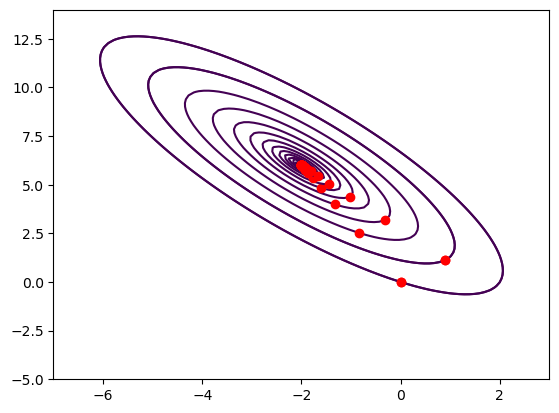

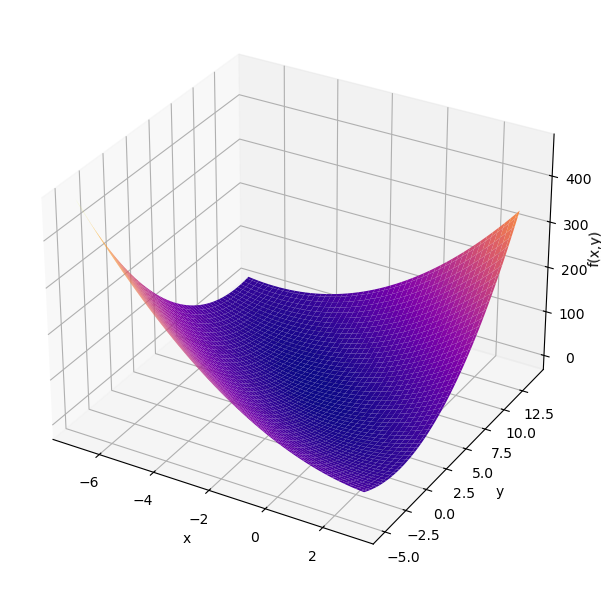

In [4]:
A=np.array([[8,4],[4,3]])
b=np.array([8,10])

x0 = np.array([0,0])
tol = 1e-10
itmax = 200

x=np.linspace(-7,3,100)
y=np.linspace(-5,14,100)
 
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)

sol_ST, err_vec_ST, vec_sol_ST, numit_ST = steepestdescentCL(A,b,x0,itmax, X,Y,Z,f,tol)
sol_CJ, err_vec_CJ, vec_sol_CJ, numit_CJ = conjugate_gradientCL(A,b,x0,itmax, X,Y,Z,f,tol)

fig, ax = plt.subplots(1, 1, figsize = (6,6), subplot_kw={'projection':'3d'})
ax.plot_surface(X, Y, Z, cmap = 'plasma')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('f(x,y)', labelpad=0.01)
plt.tight_layout()
plt.show()


## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [7]:
def creaPoisson(n):
    P = np.zeros((n,n))
    mainD = 4*np.ones(n)
    secondD = -1*np.ones(n-1)
    fourthD = -1*np.ones(n-3)
    return P +  np.diag(mainD) +\
                np.diag(secondD, -1) + np.diag(secondD, 1) +\
                np.diag(fourthD, 3) + np.diag(fourthD, -3)


n_values = np.arange(10, 101, 2)
tol = 1e-10
itmax = 1000

for n in n_values:
    P = creaPoisson(n)
    b = np.sum(P, 1)
    x0 = np.zeros(n)
    sol_ST, res_vec_ST, vec_sol_ST, numit_ST = sf.steepestdescent(P,b,x0, itmax, tol)
    sol_CJ, res_vec_CJ, vec_sol_CJ, numit_CJ = sf.conjugate_gradient(P,b,x0, itmax, tol)

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

Dalla teoria sappiamo che nel metodo del gradiente

$$
\| e_k \|_A \leq \frac{K(A) - 1}{K(A) + 1} \| e_0 \|_A
$$

quindi l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo: maggiore è l'indice di condizionamento, più il fattore di riduzione dell'errore si avvicina a 1.

Valutiamo quindi l'espressione:

$$
\frac{K(A) - 1}{K(A) + 1}
$$

nel nostro caso.


Dalla teoria sappiamo che nel metodo del gradiente coniugato

$$
\| e_k \|_A \leq \frac{\sqrt{K(A)} - 1}{\sqrt{K(A)} + 1} \| e_0 \|_A
$$

quindi l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo, ma meno gravemente rispetto al metodo del gradiente: maggiore è l'indice di condizionamento, più il fattore di riduzione dell'errore si avvicina a 1.

L'espressione per il fattore di riduzione dell'errore è:

$$
\frac{\sqrt{K(A)} - 1}{\sqrt{K(A)} + 1}
$$

Valutiamo quindi questa espressione nel nostro caso.
